In [40]:
import sqlite3
import pandas
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pandas.set_option('display.max_rows', 500)

In [3]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

## Part 1: Wrangling
### Problem 1

In [4]:
stats_query = "SELECT teamID, yearID, franchID, W, G, (W * 1.0) / (G * 1.0) * 100 as win_percentage FROM Teams"
team_stats = pandas.read_sql(stats_query, conn)
team_stats

,teamID,yearID,franchID,W,G,win_percentage
0,BS1,1871,BNA,20,31,64.516129
1,CH1,1871,CNA,19,28,67.857143
2,CL1,1871,CFC,10,29,34.482759
3,FW1,1871,KEK,7,19,36.842105
4,NY2,1871,NNA,16,33,48.484848
...,...,...,...,...,...,...
2770,PIT,2014,PIT,88,162,54.320988
2771,SDN,2014,SDP,77,162,47.530864
2772,SFN,2014,SFG,88,162,54.320988
2773,SLN,2014,STL,90,162,55.555556


In [5]:
salary_query = "SELECT yearID, teamID, salary  FROM Salaries"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries

,yearID,teamID,salary
0,1985,ATL,870000.0
1,1985,ATL,550000.0
2,1985,ATL,545000.0
3,1985,ATL,633333.0
4,1985,ATL,625000.0
...,...,...,...
24753,2014,WAS,3450000.0
24754,2014,WAS,3975000.0
24755,2014,WAS,20000000.0
24756,2014,WAS,7500000.0


Relation containing: total payroll, winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination), franchise ids, number of wins, number of games).

In [6]:
relation_query = '''WITH total_payroll as 
                    (SELECT teamID, 
                            yearID, 
                            sum(salary) as payroll 
                    FROM Salaries GROUP BY teamID, yearID)
                    SELECT Teams.teamID,
                        Teams.yearID,
                        Teams.lgID,
                        payroll,
                        franchID,
                        rank, 
                        W,
                        G, 
                        ((W * 1.0 / G * 1.0) * 100) as win_percentage
                    FROM total_payroll, Teams
                    WHERE total_payroll.yearID = Teams.yearID and
                    total_payroll.teamID = Teams.teamID'''
relation = pandas.read_sql(relation_query, conn)


In [7]:
relation.head()

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage
0,ATL,1985,NL,14807000.0,ATL,5,66,162,40.740741
1,BAL,1985,AL,11560712.0,BAL,4,83,161,51.552795
2,BOS,1985,AL,10897560.0,BOS,5,81,163,49.693252
3,CAL,1985,AL,14427894.0,ANA,2,90,162,55.555556
4,CHA,1985,AL,9846178.0,CHW,3,85,163,52.147239


#### Missing data: 
Teams starts from the year 1871, whereas Salaries starts from 1985.

In [9]:
relation['teamID'].unique()

array(['ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN', 'CLE', 'DET',
       'HOU', 'KCA', 'LAN', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TEX', 'TOR', 'COL',
       'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA'],
      dtype=object)

In [10]:
relation = relation[relation["yearID"] >= 1990]

## Part 2: Exploratory Data Analysis
### Problem 2
Distribution of payrolls across teams conditioned on time:

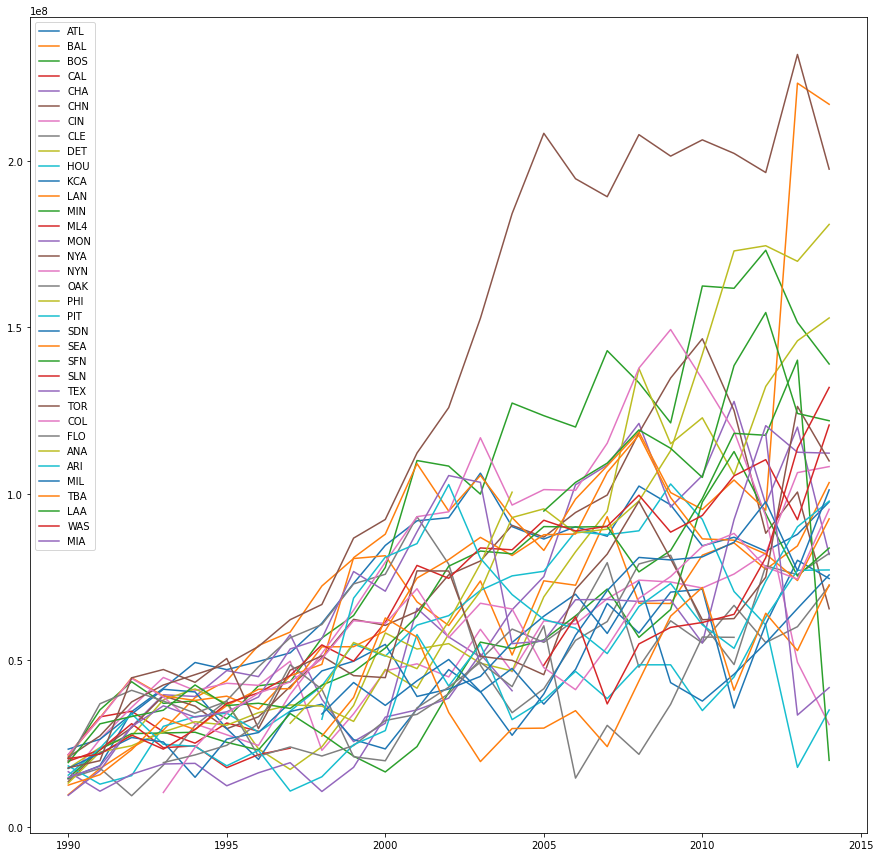

In [11]:
plt.figure(figsize=(15,15))
for team in relation["teamID"].unique():
    plt.plot(relation[relation.teamID == team]["yearID"],relation[relation.teamID == team]["payroll"], label = team)
    plt.legend()

Total payroll vs win percentage:

<AxesSubplot:xlabel='payroll', ylabel='win_percentage'>

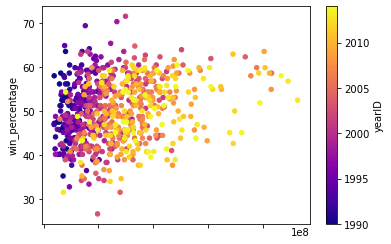

In [12]:
relation.plot.scatter(x = "payroll", y = "win_percentage", c="yearID", cmap="plasma")

### Question 1
What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, and other statistics discussed in class.

### Problem 3

### Problem 4

In [13]:
#scatter plot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods.
pandas.cut(x = relation["yearID"], bins = 5, retbins=True)

(130    (1989.976, 1994.8]
 131    (1989.976, 1994.8]
 132    (1989.976, 1994.8]
 133    (1989.976, 1994.8]
 134    (1989.976, 1994.8]
               ...        
 853      (2009.2, 2014.0]
 854      (2009.2, 2014.0]
 855      (2009.2, 2014.0]
 856      (2009.2, 2014.0]
 857      (2009.2, 2014.0]
 Name: yearID, Length: 728, dtype: category
 Categories (5, interval[float64]): [(1989.976, 1994.8] < (1994.8, 1999.6] < (1999.6, 2004.4] < (2004.4, 2009.2] < (2009.2, 2014.0]],
 array([1989.976, 1994.8  , 1999.6  , 2004.4  , 2009.2  , 2014.   ]))

In [14]:
out = pandas.cut(x = relation["yearID"], bins = 5)
#relation.plot.scatter(x = payroll.mean(), y = win_percentage.mean(), c="yearID", cmap="plasma")

ax = out.value_counts(sort=False).plot.bar(x = payroll, y=win_percentage, cmap="plasma", figsize=(10,10)) 
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

NameError: name 'payroll' is not defined

### Question 2
What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A’s spending efficiency across these time periods and specifically in the Moneyball period of 2000-2005.

## Part 3: Data Transformations
### Problem 5

In [53]:
std_payroll_array = []
for i,row in relation.iterrows():
    average_payroll = relation[relation['yearID'] == row["yearID"]]["payroll"].mean()
    std_payroll = relation[relation['yearID'] == row["yearID"]]["payroll"].std()
    standardized_payroll = (row["payroll"] - average_payroll) / std_payroll
    std_payroll_array.append(standardized_payroll)
relation["standardized payroll"] = std_payroll_array
relation

,teamID,yearID,lgID,payroll,franchID,Rank,W,G,win_percentage,Standardized Payroll,Efficiency,standardized payroll
130,ATL,1990,NL,14555501.0,ATL,6,65,162,40.123457,-0.667275,-8.208354,-0.667275
131,BAL,1990,AL,9680084.0,BAL,5,76,161,47.204969,-1.959861,2.104621,-1.959861
132,BOS,1990,AL,20558333.0,BOS,1,88,162,54.320988,0.924213,2.010454,0.924213
133,CAL,1990,AL,21720000.0,ANA,4,80,162,49.382716,1.232198,-3.697779,1.232198
134,CHA,1990,AL,9491500.0,CHW,2,94,162,58.024691,-2.009859,13.049338,-2.009859
...,...,...,...,...,...,...,...,...,...,...,...,...
853,SLN,2014,NL,120693000.0,STL,1,90,162,55.555556,0.457126,4.412740,0.457126
854,TBA,2014,AL,72689100.0,TBD,4,77,162,47.530864,-0.593171,-0.986208,-0.593171
855,TEX,2014,AL,112255059.0,TEX,5,67,162,41.358025,0.272509,-9.323248,0.272509
856,TOR,2014,AL,109920100.0,TOR,3,83,162,51.234568,0.221422,0.681014,0.221422


### Problem 6

### Question 3

### Problem 7

Text(0, 0.5, 'Win Percentage')

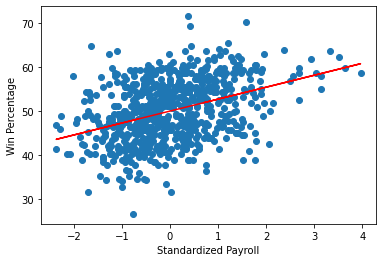

In [54]:
plt.scatter(x=relation["standardized payroll"],y=relation["win_percentage"])
lin_regr = stats.linregress(relation["Standardized Payroll"],y=relation["win_percentage"])
plt.plot(relation["Standardized Payroll"], lin_regr.intercept + lin_regr.slope*relation["Standardized Payroll"],"r")
plt.xlabel("Standardized Payroll")
plt.ylabel("Win Percentage")


### Problem 8

In [70]:
relation["efficiency"] = relation["win_percentage"] - (50 + (2.5*relation["standardized payroll"]))
print(relation["efficiency"].max(),relation["efficiency"].min())

20.65731993352356 -21.513506946415138


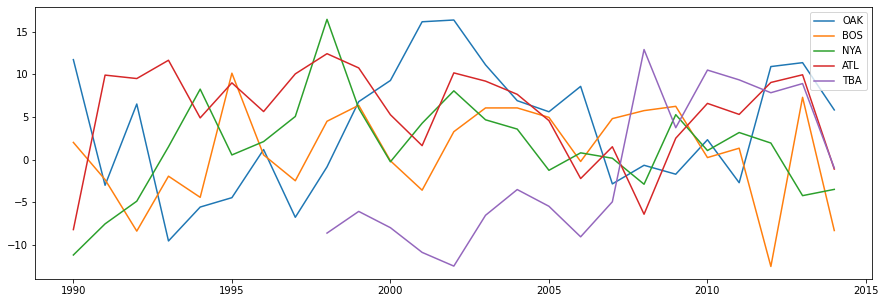

In [74]:

team_lst = ["OAK","BOS","NYA","ATL","TBA"]

plt.figure(figsize=(15,5)) #make figure wider for ease of viewing
for team in team_lst:
    plt.plot(relation[relation["teamID"]==team]["yearID"], relation[relation["teamID"]==team]["efficiency"],label=team)
plt.legend()

### Question 4

Oaklands efficiency was among the highest in the league during its moneyball period. Considering the highest efficiency in the league is around 20, it is impressive that the A's maintained a very high efficiency during its moneyball period.